In [0]:
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

In [0]:
# Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id',  'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 
        'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',  'class']
df = pd.read_csv(url, names=names)

In [3]:
# Preprocessing
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

# Transformation
df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df.values), columns=df.columns)

print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [4]:
# Visualization
print(df.loc[5])
df.describe()

clump_thickness           0.777778
uniform_cell_size         1.000000
uniform_cell_shape        1.000000
marginal_adhesion         0.777778
single_epithelial_size    0.666667
bare_nuclei               1.000000
bland_chromatin           0.888889
normal_nucleoli           0.666667
mitoses                   0.000000
class                     1.000000
Name: 5, dtype: float64


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.379749,0.237164,0.245271,0.200763,0.246225,0.977047,0.270863,0.207439,0.065490,0.344778
std,0.312860,0.339051,0.330213,0.317264,0.246033,0.149650,0.270929,0.339293,0.190564,0.475636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.999910,0.111111,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.999910,0.222222,0.000000,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.333333,0.333333,0.999950,0.444444,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


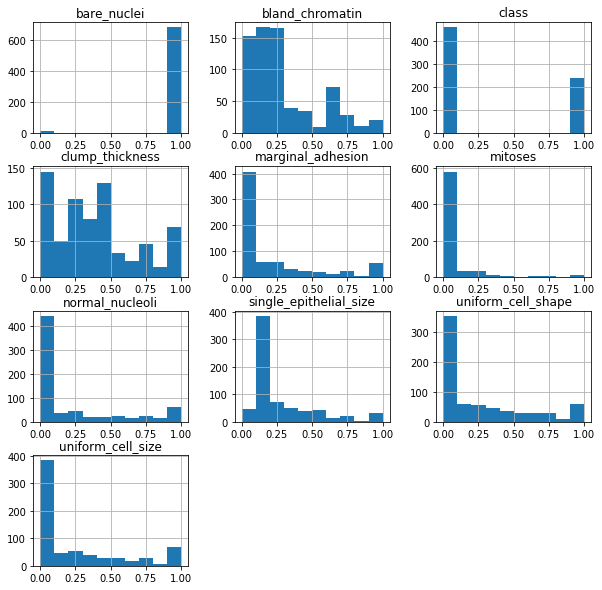

In [5]:
# Histogram for each variable
df.hist(figsize = (10, 10))
plt.show()

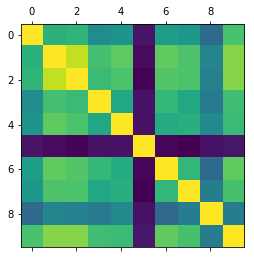

In [6]:
# Correlation matrix
corr = df.corr()
plt.matshow(corr)
plt.show()

In [0]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [0]:
# Specific testing options
seed = 8
scoring = 'accuracy'

In [0]:
# Training models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))
models.append(('GaussianNB', GaussianNB()))
models.append(('XGBClassifier', XGBClassifier()))

In [10]:
# Evaluate each models
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{}: {:.4f} ({:.4f})'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.9624 (0.0233)
SVM: 0.9606 (0.0251)
GaussianNB: 0.9588 (0.0241)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

XGBClassifier: 0.9589 (0.0226)


In [11]:
# Make predictions
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9357142857142857
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95        84
         1.0       0.93      0.91      0.92        56

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

SVM
0.95
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        84
         1.0       0.95      0.93      0.94        56

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140

GaussianNB
0.9285714285714286
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        84
         1.0       0.90      0.93      0.91        56

    accuracy                           0.93       140
   macro avg       0.92      0.93      0.93       140
weighted avg

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNN


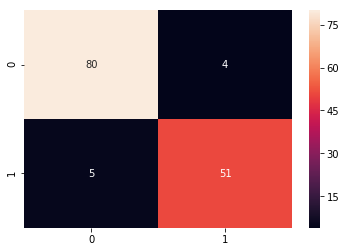

SVM


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


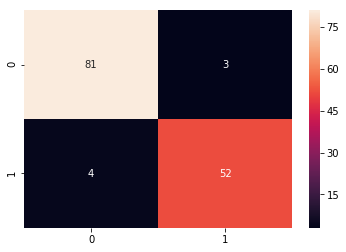

GaussianNB


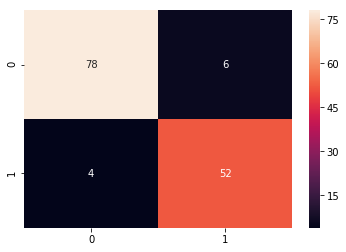

XGBClassifier


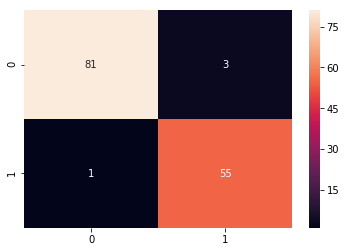

In [12]:
# Confusion matrix
import seaborn as sn
for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(name)
  data = pd.DataFrame(confusion_matrix(y_test, predictions))
  sn.heatmap(data, annot=True)
  plt.show()